# Script for studying the use of graphs in python:

In [1]:
import numpy as np
from random import uniform,randint
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
from scipy import signal
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
import networkx as nx
import math
import jgraph as ig

In [2]:
from modules.distances import l1dist,distgraph

In [3]:
## Sorting point masses into the 2D space:
xmin = -10.0
xmax = +10.0
ymin = -10.0
ymax = +10.0

npoints = 20
x = np.zeros(npoints)
y = np.zeros(npoints)
node = np.zeros(npoints)

In [4]:
for i in range(npoints):
    node[i] = i
    x[i] = uniform(xmin,xmax)
    y[i] = uniform(ymin,ymax)

In [5]:
# generation of matrix adjacent:
matrix = {'node':node, 'x':x, 'y':y}

In [6]:
matrix['x'][4]

9.596059235656469

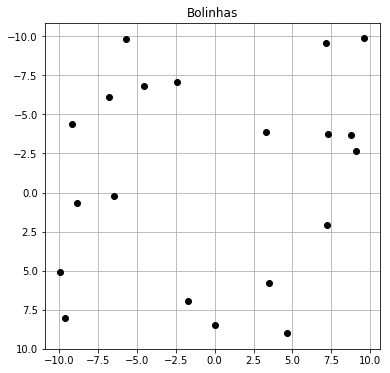

In [7]:
###--------##########################
plt.figure( figsize=(6,6) )
p1 = plt.plot(x, y, 'ok' )
plt.title('Bolinhas')
plt.grid()

plt.xlim( min(x)-1.0, max(x)+1.0 )
plt.ylim( min(y)-1.0, max(y)+1.0 )

plt.gca().invert_yaxis()

plt.show()

In [8]:
# Lets see what's going on here:
S = nx.Graph()
for i in range(npoints):
    S.add_node(i) #,pos=(x[i],y[i]) )
    for j in range(npoints):
        S.add_edge(i,j,weight=l1dist(x,y)[i][j])
TS = nx.minimum_spanning_tree(S)

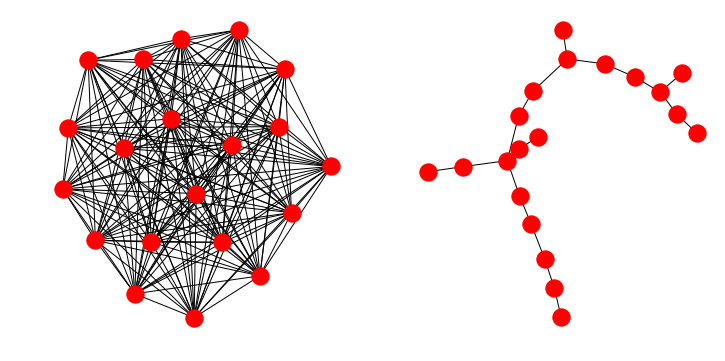

In [9]:
plt.figure(figsize=(12,6))
plt.subplot(121)
nx.draw(S)
plt.subplot(122)
nx.draw(TS)
plt.show()

In [12]:
#CALCULANDO A MEDIA
dm1 = []
for (u, v, wt) in TS.edges.data('weight'): #ACESSA OS PESOS DOS VERTICES
    print('(%d, %d, %.3f)' % (u, v, wt))
    dm1.append(wt)
#print(l1dist(x,y)[1][12])
s = 0
for i in dm1:
    s+=i
dmst = s/(len(dm1)) 
print(dmst)

(0, 18, 1.326)
(1, 12, 2.986)
(1, 2, 4.090)
(2, 15, 5.359)
(3, 6, 4.354)
(3, 10, 5.096)
(4, 7, 2.733)
(5, 14, 5.881)
(5, 6, 7.481)
(7, 14, 5.919)
(8, 14, 4.087)
(8, 16, 8.906)
(9, 15, 2.794)
(10, 17, 3.296)
(11, 19, 3.221)
(11, 15, 5.548)
(12, 16, 2.382)
(12, 13, 4.153)
(14, 18, 1.553)
4.271822724103674


# TODO: Entender as saidas do MST para podermos calcular a funcao de equidistancia para calcular a funcao $\theta$

># <center> $\theta = \sum_i (d_{mst}^i - \overline{d_{mst}})$

In [11]:
#CALCULANDO O PHI VIA A FUNCAO CRIADA
phi = distgraph(TS)[0]
print(phi) #NEGATIVO - MATEMATICAMENTE CERTO

-2.220446049250313e-14
